In [1]:
import  pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler




In [2]:
import sys
import os

# Add scripts path
sys.path.append(os.path.abspath('../scripts'))

In [4]:
from load_data import connect_to_db
from data_cleaning import  clean_numeric_columns, remove_outliers
from data_formatting import format_columns, convert_time_to_hours, format_traffic_data
from data_transform import perform_clustering, aggregate_data, top_n_values


In [5]:
query = "SELECT * FROM xdr_data;"
df = connect_to_db(query)
if df is not None:
    print("successfuly connected")
else:
    print("failed to connect")

Database connected successfully!


/home/gabie/Telecom-User-Analysis/scripts/load_data.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query,conn)


successfuly connected


In [6]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [25]:
top_handsets = df['Handset Type'].value_counts().head(10)
print("Top 10 Handsets:\n", top_handsets)


Top 10 Handsets:
 Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [8]:
top_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print("Top 3 Handset Manufacturers:\n", top_manufacturers)


Top 3 Handset Manufacturers:
 Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [78]:
for manufacturer in top_manufacturers.index:
    top_handsets_per_manufacturer = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    print(f"Top 5 Handsets for {manufacturer}:\n", top_handsets_per_manufacturer)


Top 5 Handsets for Apple:
 Series([], Name: count, dtype: int64)
Top 5 Handsets for Samsung:
 Series([], Name: count, dtype: int64)
Top 5 Handsets for Huawei:
 Series([], Name: count, dtype: int64)


In [77]:
# Analyze User Behavior on Applications Analyze User Behavior on Applications
user_behavior = df.groupby('IMSI').agg({
    'Bearer Id': 'sum',
    'Dur. (ms)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
})
user_behavior['total_data'] = user_behavior['Total DL (Bytes)'] + user_behavior['Total UL (Bytes)']
print(user_behavior.head())


                 Bearer Id  Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
IMSI                                                                        
2.040471e+14  7.277826e+18   869844.0        78697597.0        60456049.0   
2.040808e+14  7.277826e+18   877385.0       194828056.0        37295915.0   
2.082001e+14  6.917538e+18    86019.0        31376981.0        53794658.0   
2.082001e+14  6.917538e+18    86254.0       392918313.0        33583272.0   
2.082001e+14  2.622897e+19   573923.0       961767023.0        71325004.0   

                total_data  
IMSI                        
2.040471e+14  1.391536e+08  
2.040808e+14  2.321240e+08  
2.082001e+14  8.517164e+07  
2.082001e+14  4.265016e+08  
2.082001e+14  1.033092e+09  


In [23]:
# Fill missing values for numeric columns
numeric_columns = df.select_dtypes(include=["number"]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Fill missing values for non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=["number"]).columns
df[non_numeric_columns] = df[non_numeric_columns].fillna("Unknown")

# Verify there are no missing values
print(df.isnull().sum())


Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [57]:
from data_cleaning import clean_handset_data
df = clean_handset_data(df,"Handset Type")


In [16]:
# Define a function to handle outliers using the IQR method
def handle_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.clip(col, lower_bound, upper_bound)
numeric_cols = df.select_dtypes(include=["number"]).columns

# Apply outlier treatment for numeric columns
for col in numeric_cols:
    df[col] = handle_outliers(df[col])


In [13]:
# Summary of data types and unique values
variable_summary = pd.DataFrame({
    "Data Type": df.dtypes,
    "Unique Values": df.nunique()
})
print("Variable Summary:")
print(variable_summary)

# Save this summary to a CSV for presentation purposes
variable_summary.to_csv("variable_summary.csv", index=True)


Variable Summary:
                                         Data Type  Unique Values
Bearer Id                                  float64         134708
Start                                       object           9997
Start ms                                   float64           1000
End                                         object           6403
End ms                                     float64           1000
Dur. (ms)                                  float64          89525
IMSI                                       float64         107265
MSISDN/Number                              float64         106856
IMEI                                       float64         107270
Last Location Name                          object          45547
Avg RTT DL (ms)                            float64           2130
Avg RTT UL (ms)                            float64            722
Avg Bearer TP DL (kbps)                    float64          41753
Avg Bearer TP UL (kbps)                    float64        

In [12]:
#Segment users into top five decile classes based on Dur. (ms) and compute total data for each decile.
df['total_data'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
df['duration_decile'] = pd.qcut(df['Dur. (ms)'], 5, labels=False)

# Compute total data per decile
decile_data = df.groupby('duration_decile')['total_data'].sum().reset_index()
print("Decile Data Summary:")
print(decile_data)


Decile Data Summary:
   duration_decile    total_data
0              0.0  1.488357e+13
1              1.0  2.362045e+13
2              2.0  6.087404e+12
3              3.0  1.485493e+13
4              4.0  1.491834e+13


In [14]:
basic_metrics = df.describe()
print("Basic Metrics Summary:")
print(basic_metrics)

# Save to CSV for reporting
basic_metrics.to_csv("basic_metrics.csv")


Basic Metrics Summary:
          Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.490100e+05  150000.000000  150000.000000  1.500000e+05  1.494310e+05   
mean   1.013887e+19     499.188200     498.800880  1.046086e+05  2.082016e+14   
std    2.893173e+18     288.611834     288.097653  8.103762e+04  2.148809e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.744050e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324302e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.489350e+05  1.494290e+05    122172.000000    122189.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.447443e+12  2.241637e

In [17]:
#Non-Graphical Univariate Analysis

dispersion_params = df[numeric_cols].agg(['mean', 'median', 'std', 'var', 'min', 'max'])
print("Dispersion Parameters:")
print(dispersion_params)

# Save to CSV for reporting
dispersion_params.to_csv("dispersion_params.csv")


Dispersion Parameters:
           Bearer Id      Start ms        End ms     Dur. (ms)          IMSI  \
mean    1.013887e+19    499.188200    498.800880  9.957223e+04  2.082015e+14   
median  7.349883e+18    499.000000    500.000000  8.639900e+04  2.082015e+14   
std     2.893173e+18    288.611834    288.097653  5.908472e+04  3.932451e+08   
var     8.370447e+36  83296.790866  83000.257780  3.491004e+09  1.546417e+17   
min     6.917538e+18      0.000000      0.000000  7.142000e+03  2.082008e+14   
max     1.318654e+19    999.000000    999.000000  2.449149e+05  2.082023e+14   

        MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
mean     3.366910e+10  4.847455e+13        56.427864        10.335804   
median   3.366371e+10  3.572201e+13        45.000000         5.000000   
std      3.421164e+07  2.241637e+13        33.225682        10.886596   
var      1.170437e+15  5.024937e+26      1103.945939       118.517974   
min      3.360300e+10  4.400152e+11         0.00000

Text(0.5, 1.0, 'Boxplot for Numeric Variables')

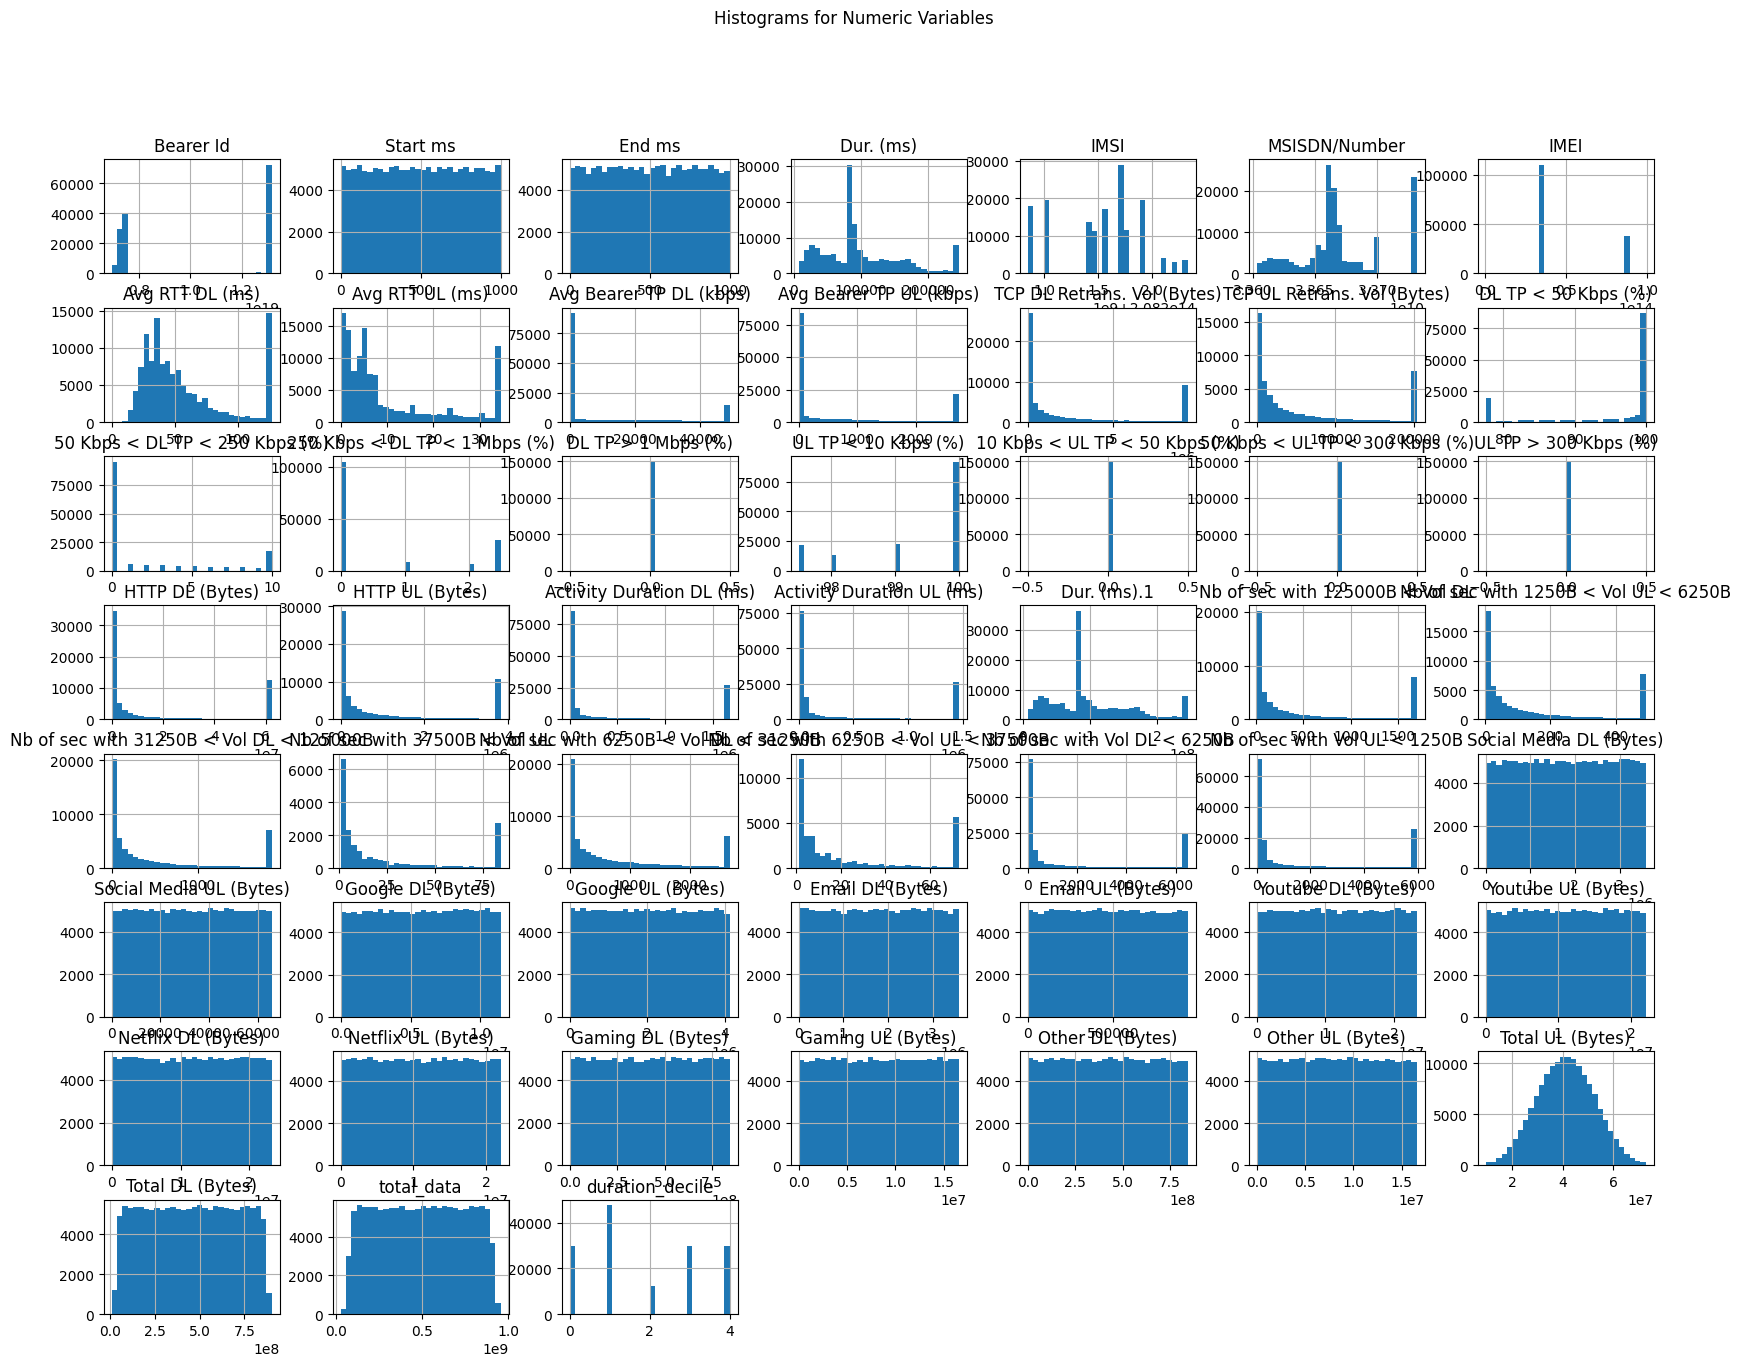

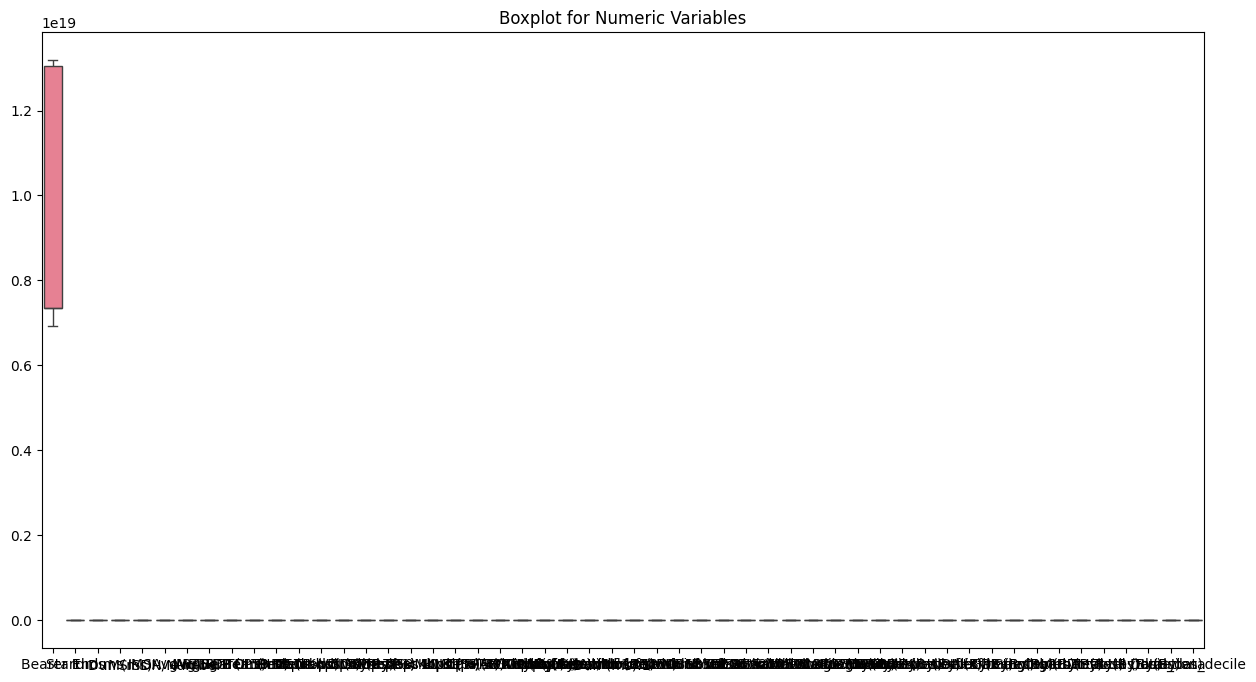

In [18]:
# Histogram for numeric variables
df[numeric_cols].hist(bins=30, figsize=(20, 15))
plt.suptitle("Histograms for Numeric Variables")
plt.savefig("histograms.png")

# Boxplot for numeric variables
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot for Numeric Variables")


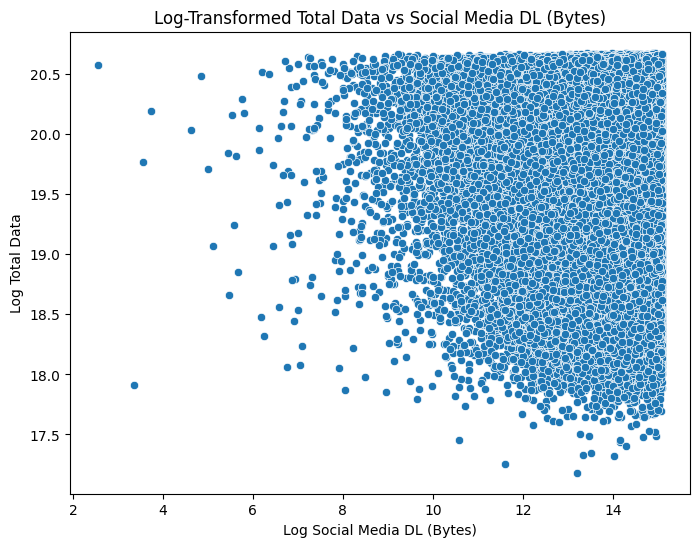

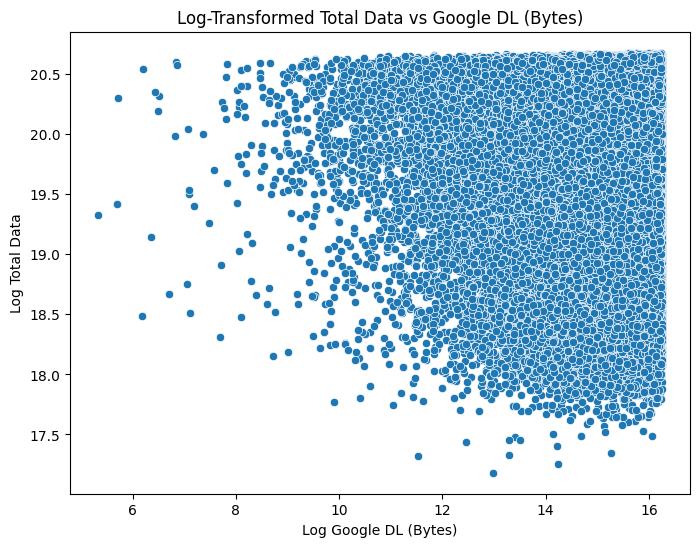

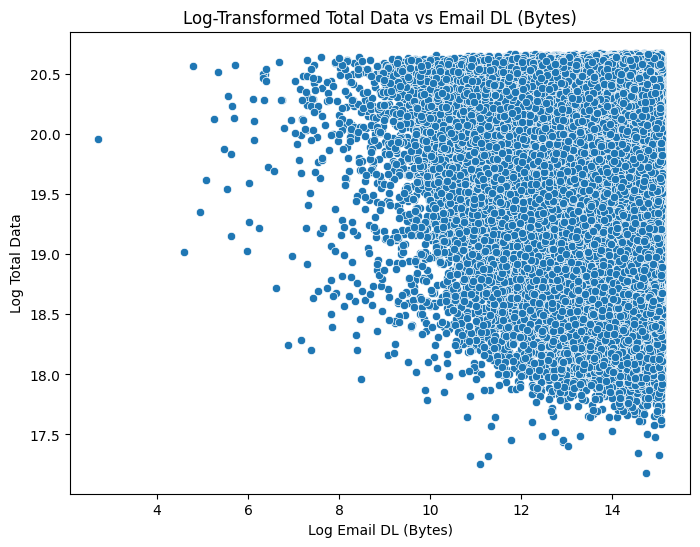

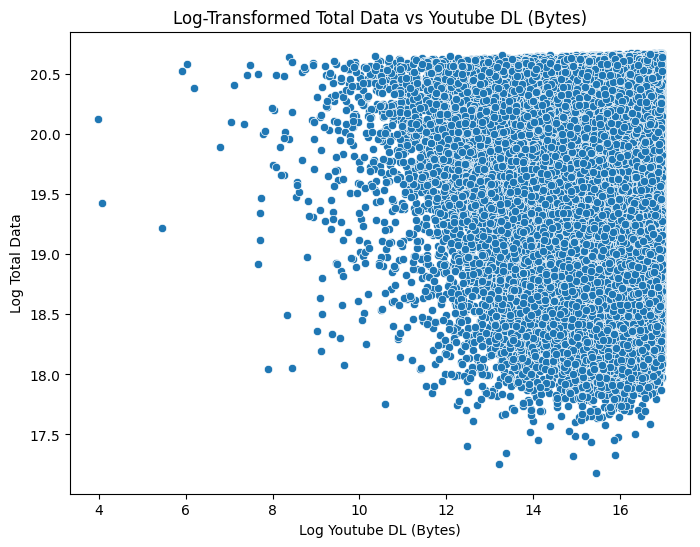

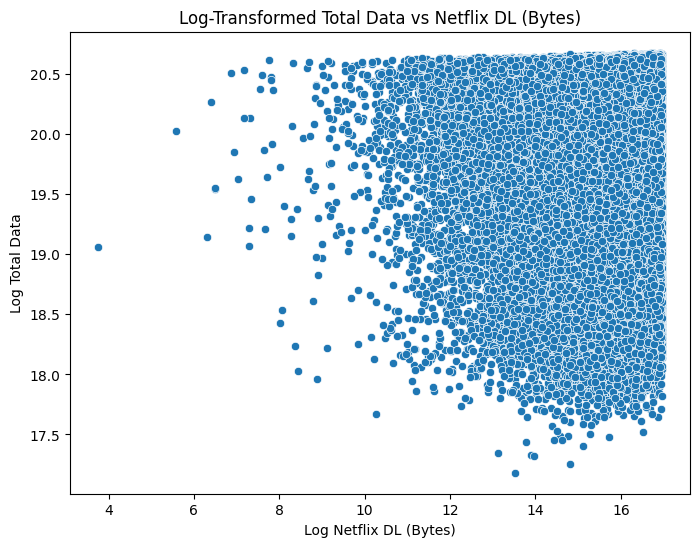

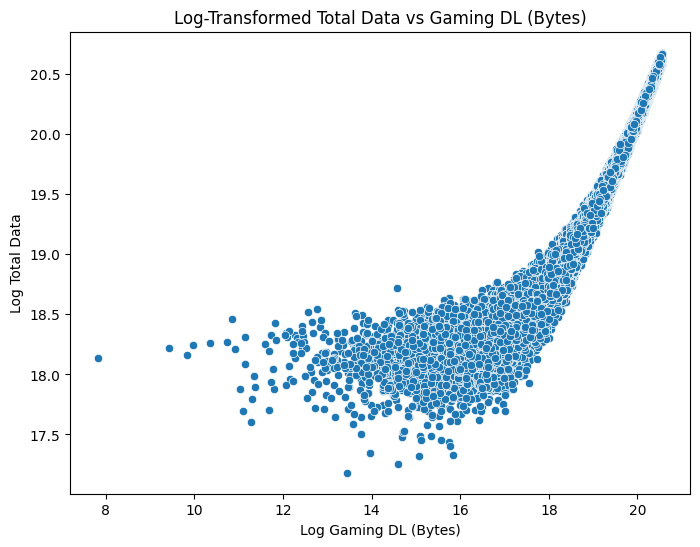

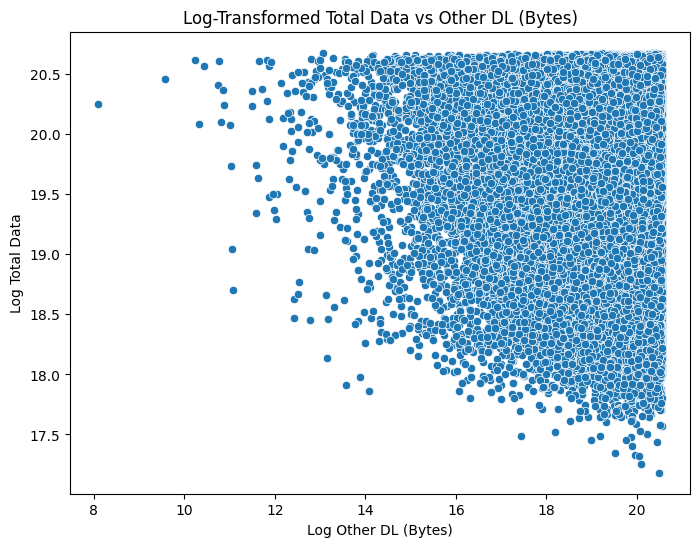

In [19]:
import numpy as np

# Scatterplot for total data vs applications (with log transform)
app_cols = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
            'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']

for col in app_cols:
    plt.figure(figsize=(8, 6))
    
    # Log-transform the data (avoid log(0) by adding a small constant)
    log_x = np.log1p(df[col])  # log(1 + x) ensures no issues with zero values
    log_y = np.log1p(df['total_data'])
    
    # Scatterplot with log-transformed data
    sns.scatterplot(x=log_x, y=log_y)
    plt.title(f"Log-Transformed Total Data vs {col}")
    plt.xlabel(f"Log {col}")
    plt.ylabel("Log Total Data")
    
    # Save the plot
    plt.show()


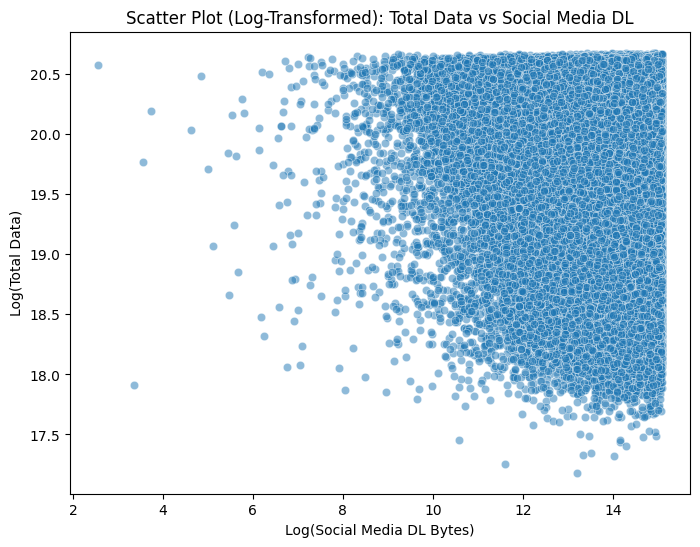

In [20]:
import numpy as np

# Apply log transformation
df['log_social_media_dl'] = np.log1p(df['Social Media DL (Bytes)'])
df['log_total_data'] = np.log1p(df['total_data'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['log_social_media_dl'], y=df['log_total_data'], alpha=0.5)
plt.title("Scatter Plot (Log-Transformed): Total Data vs Social Media DL")
plt.xlabel("Log(Social Media DL Bytes)")
plt.ylabel("Log(Total Data)")
plt.savefig("log_scatter_social_media_dl.png")


Correlation Matrix:
                         Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                 1.000000          -0.001954   
Google DL (Bytes)                      -0.001954           1.000000   
Email DL (Bytes)                        0.004745          -0.000039   
Youtube DL (Bytes)                     -0.001389           0.001760   
Netflix DL (Bytes)                     -0.001817           0.000548   
Gaming DL (Bytes)                       0.001018          -0.001421   
Other DL (Bytes)                        0.006126          -0.002557   

                         Email DL (Bytes)  Youtube DL (Bytes)  \
Social Media DL (Bytes)          0.004745           -0.001389   
Google DL (Bytes)               -0.000039            0.001760   
Email DL (Bytes)                 1.000000            0.001679   
Youtube DL (Bytes)               0.001679            1.000000   
Netflix DL (Bytes)               0.001351            0.001202   
Gaming DL (Bytes)    

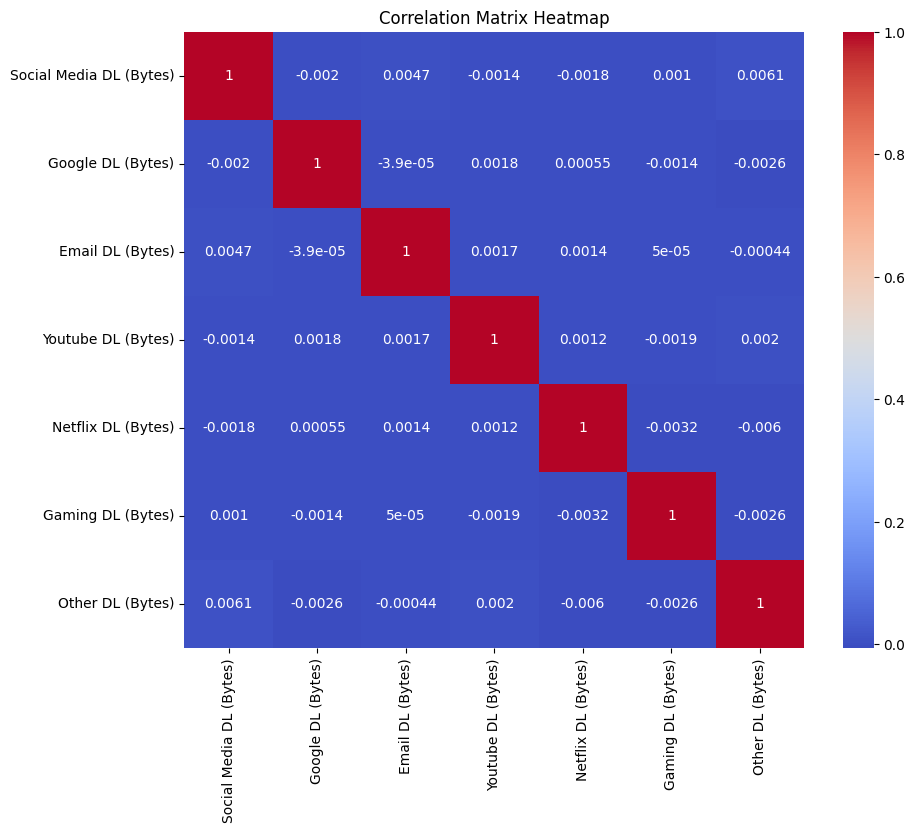

In [21]:
# Correlation matrix
corr_matrix = df[app_cols].corr()
print("Correlation Matrix:")
print(corr_matrix)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.savefig("correlation_heatmap.png")


In [ ]:
# Dimensionality Reduction (PCA)
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[app_cols])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Variance explained by each component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=10, alpha=0.6)
plt.title("PCA Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(alpha=0.3)


In [ ]:
 # TASK 2

In [91]:
# Aggregating engagement metrics per user

engagement_metrics = df.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',  
    'Total DL (Bytes)': 'sum',   
    'Total UL (Bytes)': 'sum',   
    'Bearer Id': 'count'      
}).rename(columns={
    'Dur. (ms)': 'Total_Duration',
    'Total DL (Bytes)': 'Total_DL',
    'Total UL (Bytes)': 'Total_UL',
    'Bearer Id': 'Session_Frequency'
})

# Total traffic (download + upload)
engagement_metrics['Total_Traffic'] = engagement_metrics['Total_DL'] + engagement_metrics['Total_UL']

# Top 10 customers per engagement metric
top_10_duration = engagement_metrics.nlargest(10, 'Total_Duration')
top_10_traffic = engagement_metrics.nlargest(10, 'Total_Traffic')
top_10_frequency = engagement_metrics.nlargest(10, 'Session_Frequency')

print("Top 10 customers by duration:")
print(top_10_duration)

print("Top 10 customers by traffic:")
print(top_10_traffic)

print("Top 10 customers by session frequency:")
print(top_10_frequency)


Top 10 customers by duration:
               Total_Duration      Total_DL      Total_UL  Session_Frequency  \
MSISDN/Number                                                                  
3.373178e+10     2.364117e+09  1.053428e+13  9.586824e+11              23255   
3.360300e+10     7.613873e+07  3.763600e+11  3.321207e+10                805   
3.362578e+10     4.135306e+06  7.770043e+09  7.295774e+08                 17   
3.362632e+10     4.004641e+06  7.301517e+09  6.696507e+08                 18   
3.361489e+10     3.897619e+06  8.156743e+09  6.894830e+08                 17   
3.365973e+10     3.490637e+06  7.081602e+09  6.242603e+08                 16   
3.367588e+10     3.330290e+06  7.309542e+09  5.815688e+08                 15   
3.366716e+10     3.111894e+06  5.052068e+09  5.663264e+08                 13   
3.360313e+10     2.853411e+06  4.540607e+09  4.355876e+08                 12   
3.362708e+10     2.780499e+06  5.309479e+09  4.452519e+08                 12   

         

In [28]:
# Normalize Metrics and Perform K-Means Clustering

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Normalize the metrics
scaler = MinMaxScaler()
engagement_metrics_normalized = scaler.fit_transform(engagement_metrics[['Total_Duration', 'Total_Traffic', 'Session_Frequency']])

# Run k-means (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_metrics['Cluster'] = kmeans.fit_predict(engagement_metrics_normalized)

print("Cluster Assignments:")
print(engagement_metrics['Cluster'].value_counts())


NameError: name 'engagement_metrics' is not defined

In [94]:
# Compute Min, Max, Average, and Total Metrics for Each Cluster


cluster_metrics = engagement_metrics.groupby('Cluster').agg({
    'Total_Duration': ['min', 'max', 'mean', 'sum'],
    'Total_Traffic': ['min', 'max', 'mean', 'sum'],
    'Session_Frequency': ['min', 'max', 'mean', 'sum']
})

print("Cluster Metrics:")
print(cluster_metrics)


Cluster Metrics:
        Total_Duration                                            \
                   min           max          mean           sum   
Cluster                                                            
0         7.146000e+03  4.135306e+06  1.385306e+05  1.242606e+10   
1         2.364117e+09  2.364117e+09  2.364117e+09  2.364117e+09   
2         7.613873e+07  7.613873e+07  7.613873e+07  7.613873e+07   

        Total_Traffic                                            \
                  min           max          mean           sum   
Cluster                                                           
0        3.324901e+07  8.846226e+09  6.904303e+08  6.193091e+13   
1        1.149296e+13  1.149296e+13  1.149296e+13  1.149296e+13   
2        4.095721e+11  4.095721e+11  4.095721e+11  4.095721e+11   

        Session_Frequency                               
                      min    max          mean     sum  
Cluster                                                 


In [95]:
# Aggregate user total traffic per application
app_cols = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
            'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']

application_metrics = []  # Store metrics for all applications

for app_col in app_cols:
    # Calculate total traffic for each user (MSISDN/Number) for this application
    app_data = df.groupby('MSISDN/Number').agg({
        app_col: 'sum',  # Aggregate the download traffic for this app
        'Total UL (Bytes)': 'sum'  # Aggregate the upload traffic
    }).rename(columns={
        app_col: 'Total_DL',  # Rename download column
        'Total UL (Bytes)': 'Total_UL'  # Rename upload column
    })
    
    # Compute total traffic (download + upload)
    app_data['Total_Traffic'] = app_data['Total_DL'] + app_data['Total_UL']
    
    # Add application name as a column
    app_data['Application'] = app_col.replace(' DL (Bytes)', '')  # Clean app name
    
    # Append to application_metrics list
    application_metrics.append(app_data)

# Concatenate all application metrics into a single DataFrame
application_metrics = pd.concat(application_metrics)

# Top 10 users per application
top_users_per_app = application_metrics.groupby('Application').apply(
    lambda x: x.nlargest(10, 'Total_Traffic')
)

print("Top 10 users per application:")
print(top_users_per_app)


Top 10 users per application:
                               Total_DL      Total_UL  Total_Traffic  \
Application MSISDN/Number                                              
Email       3.373178e+10   4.191589e+10  9.586824e+11   1.000598e+12   
            3.360300e+10   1.462891e+09  3.321207e+10   3.467496e+10   
            3.362578e+10   3.189541e+07  7.295774e+08   7.614728e+08   
            3.361489e+10   3.360721e+07  6.894830e+08   7.230902e+08   
            3.362632e+10   3.340478e+07  6.696507e+08   7.030555e+08   
...                                 ...           ...            ...   
Youtube     3.365973e+10   1.196581e+08  6.242603e+08   7.439185e+08   
            3.367588e+10   1.586652e+08  5.815688e+08   7.402340e+08   
            3.366716e+10   1.419727e+08  5.663264e+08   7.082991e+08   
            3.369879e+10   1.669003e+08  5.303431e+08   6.972434e+08   
            3.362708e+10   1.873233e+08  4.452519e+08   6.325753e+08   

                          Applica

/tmp/ipykernel_11112/580828224.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_users_per_app = application_metrics.groupby('Application').apply(


/tmp/ipykernel_11112/3840893848.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Application', y='Total_Traffic', data=top_app_data, estimator='sum', ci=None)


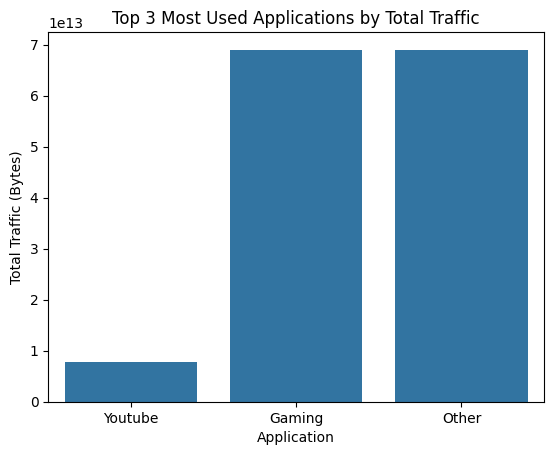

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 3 applications by total traffic
top_apps = application_metrics.groupby('Application')['Total_Traffic'].sum().nlargest(3).index

# Filter data for top 3 applications
top_app_data = application_metrics[application_metrics['Application'].isin(top_apps)]

# Plot traffic distribution
sns.barplot(x='Application', y='Total_Traffic', data=top_app_data, estimator='sum', ci=None)
plt.title("Top 3 Most Used Applications by Total Traffic")
plt.xlabel("Application")
plt.ylabel("Total Traffic (Bytes)")
plt.show()


In [ ]:
# Elbow method
sse = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(engagement_metrics_normalized)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.show()


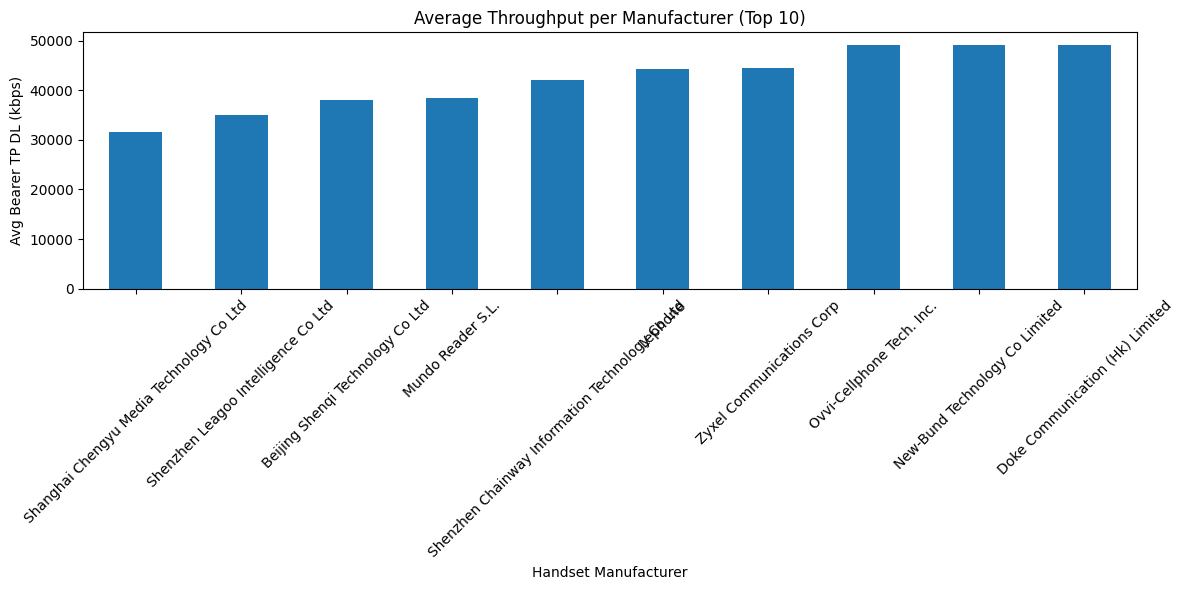

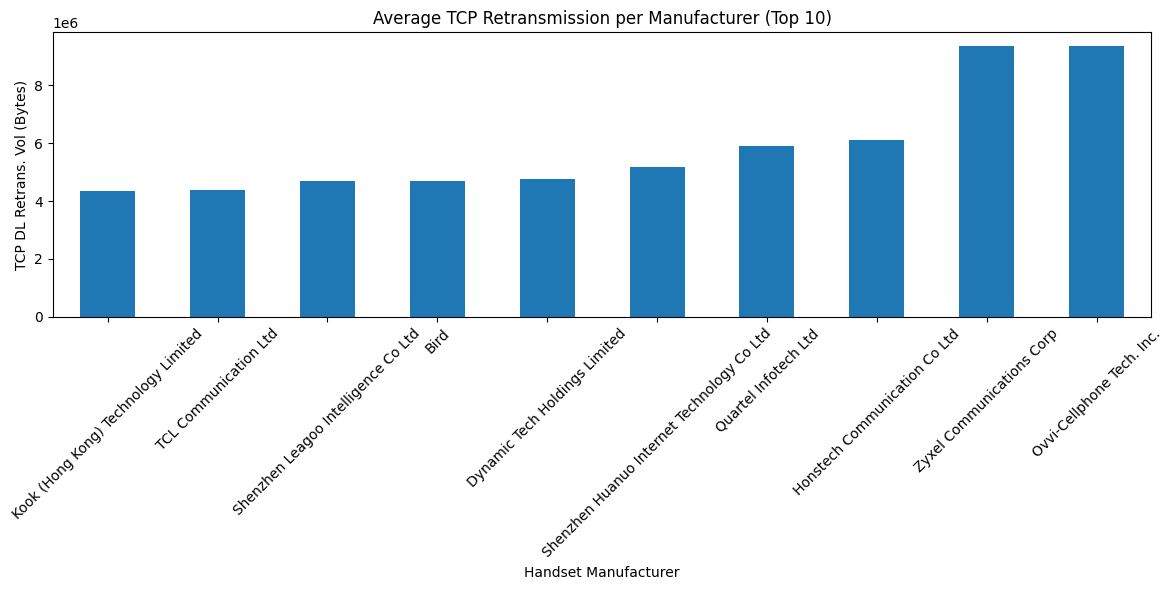

NameError: name 'KMeans' is not defined

<Figure size 640x480 with 0 Axes>

In [27]:

# Load data

# Task 3.1 - Aggregation per customer
def aggregate_metrics(df):
    # Fill missing values
    df['TCP DL Retrans. Vol (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'].fillna(df['TCP DL Retrans. Vol (Bytes)'].mean())
    df['TCP UL Retrans. Vol (Bytes)'] = df['TCP UL Retrans. Vol (Bytes)'].fillna(df['TCP UL Retrans. Vol (Bytes)'].mean())
    df['Avg RTT DL (ms)'] = df['Avg RTT DL (ms)'].fillna(df['Avg RTT DL (ms)'].mean())
    df['Avg RTT UL (ms)'] = df['Avg RTT UL (ms)'].fillna(df['Avg RTT UL (ms)'].mean())
    df['Avg Bearer TP DL (kbps)'] = df['Avg Bearer TP DL (kbps)'].fillna(df['Avg Bearer TP DL (kbps)'].mean())
    df['Avg Bearer TP UL (kbps)'] = df['Avg Bearer TP UL (kbps)'].fillna(df['Avg Bearer TP UL (kbps)'].mean())

    # Aggregate metrics
    aggregated = df.groupby('MSISDN/Number').agg({
        'TCP DL Retrans. Vol (Bytes)': 'mean',
        'TCP UL Retrans. Vol (Bytes)': 'mean',
        'Avg RTT DL (ms)': 'mean',
        'Avg RTT UL (ms)': 'mean',
        'Avg Bearer TP DL (kbps)': 'mean',
        'Avg Bearer TP UL (kbps)': 'mean'
    }).reset_index()

    aggregated['Average TCP Retransmission'] = (
        aggregated['TCP DL Retrans. Vol (Bytes)'] + aggregated['TCP UL Retrans. Vol (Bytes)']) / 2
    aggregated['Average RTT'] = (
        aggregated['Avg RTT DL (ms)'] + aggregated['Avg RTT UL (ms)']) / 2
    aggregated['Average Throughput'] = (
        aggregated['Avg Bearer TP DL (kbps)'] + aggregated['Avg Bearer TP UL (kbps)']) / 2

    return aggregated

aggregated_data = aggregate_metrics(df)

# Task 3.2 - Top, bottom, and most frequent values
def compute_top_bottom_most(df, column):
    top_10 = df[column].nlargest(10)
    bottom_10 = df[column].nsmallest(10)
    most_frequent = df[column].value_counts().head(10)
    return top_10, bottom_10, most_frequent

tcp_top, tcp_bottom, tcp_frequent = compute_top_bottom_most(df, 'TCP DL Retrans. Vol (Bytes)')
rtt_top, rtt_bottom, rtt_frequent = compute_top_bottom_most(df, 'Avg RTT DL (ms)')
throughput_top, throughput_bottom, throughput_frequent = compute_top_bottom_most(df, 'Avg Bearer TP DL (kbps)')

# Task 3.3 - Distribution & interpretation
def plot_distribution(df, column, group_by, title, top_n=10):
    """
    Plots the distribution of a specified column grouped by a category,
    showing only the top N categories based on mean values.

    Parameters:
    - df: DataFrame containing the data.
    - column: The column whose distribution is to be plotted.
    - group_by: The column to group the data by.
    - title: The title of the plot.
    - top_n: The number of top categories to include in the plot (default is 10).
    """
    # Group data by the specified column and compute the mean
    grouped = df.groupby(group_by)[column].mean().dropna()

    # Check if there is data to plot
    if grouped.empty:
        print(f"No data to plot for {column} grouped by {group_by}")
        return

    # Select the top N categories
    top_categories = grouped.nlargest(top_n)

    # Plot the data
    top_categories.sort_values().plot(kind='bar', figsize=(12, 6), title=title)
    plt.xlabel(group_by)
    plt.ylabel(column)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

# Example usage:
plot_distribution(df, 'Avg Bearer TP DL (kbps)', 'Handset Manufacturer', 
                  'Average Throughput per Manufacturer (Top 10)', top_n=10)
plt.savefig("Average Troughput per Manufacurere .png")

plot_distribution(df, 'TCP DL Retrans. Vol (Bytes)', 'Handset Manufacturer', 'Average TCP Retransmission per Manufacturer (Top 10)', top_n=10)
plt.savefig("Average TCP Retransmission per Manufacurere .png")

# Task 3.4 - K-means clustering
def perform_clustering(df):
    # Select relevant features
    features = df[['Average TCP Retransmission', 'Average RTT', 'Average Throughput']]

    # Normalize data
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(features_scaled)
    df['Cluster'] = clusters

    return df, kmeans

clustered_data, kmeans_model = perform_clustering(aggregated_data)

# Interpret clusters
for cluster_id in range(3):
    print(f"Cluster {cluster_id}:\n")
    cluster_data = clustered_data[clustered_data['Cluster'] == cluster_id]
    print(cluster_data.describe())
    print("\n---\n")


In [98]:
less_engaged_center = kmeans_model.cluster_centers_[2]  # Example: replace 2 with the correct index
worst_experience_center = kmeans_model.cluster_centers_[1]  # Example: replace 1 with the correct index


In [99]:
from scipy.spatial.distance import euclidean

def calculate_scores(data, target_center):
    return [euclidean(row, target_center) for row in data]

# Calculate scores
user_features = clustered_data[['Average TCP Retransmission', 'Average RTT', 'Average Throughput']].values
clustered_data['engagement_score'] = calculate_scores(user_features, less_engaged_center)
clustered_data['experience_score'] = calculate_scores(user_features, worst_experience_center)


In [100]:
clustered_data['satisfaction_score'] = (
    clustered_data['engagement_score'] + clustered_data['experience_score']
) / 2


In [101]:
X = clustered_data[['engagement_score', 'experience_score']]
y = clustered_data['satisfaction_score']


In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [103]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [104]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 8.827941190914576e-20
R2 Score: 1.0


In [105]:
kmeans = KMeans(n_clusters=2, random_state=42)
clustered_data['satisfaction_cluster'] = kmeans.fit_predict(
    clustered_data[['engagement_score', 'experience_score']]
)


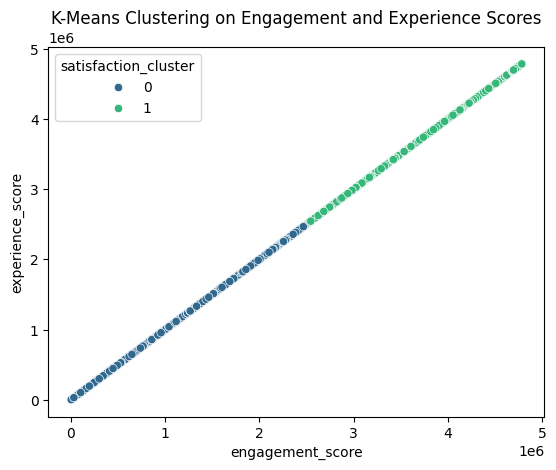

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    data=clustered_data,
    x='engagement_score',
    y='experience_score',
    hue='satisfaction_cluster',
    palette='viridis'
)
plt.title("K-Means Clustering on Engagement and Experience Scores")
plt.show()


In [107]:
cluster_summary = clustered_data.groupby('satisfaction_cluster')[
    ['satisfaction_score', 'experience_score']
].mean()
print(cluster_summary)


                      satisfaction_score  experience_score
satisfaction_cluster                                      
0                           9.867468e+05      9.867485e+05
1                           4.020160e+06      4.020162e+06


In [109]:
# Calculate the satisfaction score as the average of engagement and experience scores
aggregated_data['Satisfaction Score'] = (aggregated_data['engagement_score'] + aggregated_data['experience_score']) / 2

# Sort the customers by Satisfaction Score in descending order
sorted_customers = aggregated_data.sort_values('Satisfaction Score', ascending=False)

# Get the top 10 satisfied customers
top_10_satisfied = sorted_customers.head(10)

# Define final_results (this can contain all customers or only the top 10 depending on your needs)
final_results = sorted_customers  # Or use final_results = top_10_satisfied if you only need top 10


In [110]:
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Fetch DB credentials from environment variables
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_host = os.getenv("DB_HOST")
db_port = os.getenv("DB_PORT")
db_name = os.getenv("DB_NAME")

# Create the connection string
connection_string = f"postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"

# Create a SQLAlchemy engine
engine = create_engine(connection_string)

# Export the DataFrame to PostgreSQL
try:
    # Save the entire final_results table
    final_results.to_sql('customer_satisfaction', engine, if_exists='replace', index=False)
    
    # Save only the top 10 satisfied customers
    top_10_satisfied.to_sql('top_satisfied_customers', engine, if_exists='replace', index=False)
    
    print("Data exported successfully to PostgreSQL!")
except Exception as e:
    print(f"An error occurred: {e}")
final_results.to_csv("final_results.csv", index=False)


Data exported successfully to PostgreSQL!


In [ ]:
#

query = "SELECT * FROM customer_satisfaction;"
sf = connect_to_db(query)
if sf is not None:
    print("successfuly connected")
else:
    print("failed to connect")